# ACP
1. [tutoriel sur l'utilisation de l'ACP](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
2. [explication mathématique de l'ACP](https://maths.cnam.fr/IMG/pdf/A-C-P-.pdf)
3. [implémentation de cercle de corrélations](https://www.kaggle.com/code/karimsaieh/pca-principal-component-analysis-without-sklearn/notebook)

In [88]:
import numpy as np     # librairie de python permettant de manipuler des tableaux, ex: vecteurs, matrices, tensors, etc
import pandas as pd    
import matplotlib.pyplot as plt  # librairie de référence pour créer des graphiques sur python 


from sklearn.decomposition import PCA   # sklearn est utilisé souvent pour utiliser les modèles de machine learning

In [89]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"                              # url vers les données

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])             # loader les données 
df.sample(10)                                                                                                 # afficher un échantillon de 10 valeurs du dataframe df

,sepal length,sepal width,petal length,petal width,target
104,6.5,3.0,5.8,2.2,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
55,5.7,2.8,4.5,1.3,Iris-versicolor


### Les données 
Les données fleurs d’IRIS  est une base de données regroupant les caractéristiques de trois espèces de fleurs d’Iris, à savoir Setosa, Versicolour et Virginica.   
Chaque ligne de ce jeu de données est une observation des caractéristiques d’une fleur d’Iris.  
Ce dataset décrit les espèces d’Iris par quatre propriétés : longueur et largeur de sépales ainsi que longueur et largeur de pétales.   
La base de données comporte 150 observations (50 observations par espèce). 

### Objectif de ce tutoriel
On utilisera l'ACP pour explorer les relations entre les observations ie les fleurs de ce jeu de données et également les corrélations entre les variables. 

## Le code

#### standardisation des variables
les variables doivent être obligatoirement centrées réduites avnt la transformation par l'ACP.  
Cela revient à transformer les vriables comme suivant: $$ z = (x - \mu) / \sigma $$ 
$\mu$ est la moyenne et $\sigma$ est l'écart type de la varible x  

Pour ce faire, nous utilisons la fonction `StandardScaler`.  

In [90]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']  # ce sont les 4 variables de notre jeu de données

x = df.loc[:, features].values      # on exclut la variable target
y = df.loc[:,['target']].values     # y c'est la variable target 

# on standardise x
scaler = StandardScaler() # initialisation
x = scaler.fit_transform(x) # transformation

### Application de l'ACP sur la mtrice des  variables  x

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # on se contente de deux compsantes principales
principalComponents = pca.fit_transform(x)  
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [92]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [93]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)  
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


## visualisation

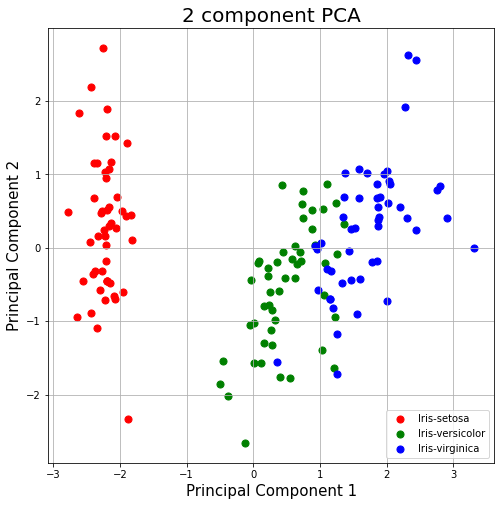

In [96]:
fig = plt.figure(figsize = (8,8)) # init & size  de la figure
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [97]:
# les valeurs propres représentant la contribution de chaque composante
print('contributions des composantes principales: ', pca.explained_variance_ratio_*100)
print('la somme des contributions des composantes principales retenues: ', sum(pca.explained_variance_ratio_*100))

contributions des composantes principales:  [72.77045209 23.03052327]
la somme des contributions des composantes principales retenues:  95.80097536148199


#### Cas de réduction de dimension avec ACP

Si on souhaite utliser une ACP pour effectuer une réduction de dimensiona dans l'objectif par exemple de faire une prédiction avec un modèle, on peut afficher les sommes cummulés des valeurs propres et décider de combien de composantes principales retenir

In [98]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
print('toutes les contributions des composantes principales: ', pca.explained_variance_ratio_*100) 


toutes les contributions des composantes principales:  [72.77045209 23.03052327  3.68383196  0.51519268]


### visualisation des valeurs propres (ou contributions)

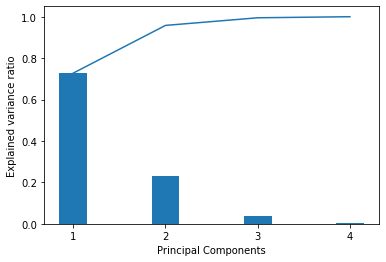

In [99]:
# like we did above visualize the PCs 
# and the cumulative variance explained by each PC
default_x_ticks = range(1,5)
plt.bar(default_x_ticks, pca.explained_variance_ratio_,
        alpha=1,
        align='center',
        width= 0.3)
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_),
)
plt.xticks(default_x_ticks)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

D'après le graphique, il est clair que à 2 composantes on a quasiment toute l'information des 4 variables. On peut donc décider d'effectuer la réduction de dimesnion avec 2 compsantes principales

## Le cercle des correlations 

In [103]:
from mlxtend.plotting import plot_pca_correlation_graph    # une librairie qui permet de visulaiser le cercle des correlations

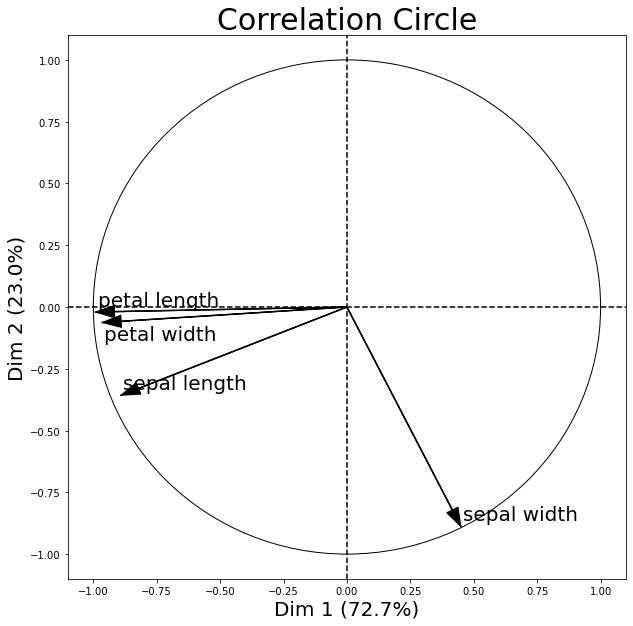

In [106]:
figure, correlation_matrix = plot_pca_correlation_graph(x, 
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

In [102]:
correlation_matrix   # matrice de correlation entre les variables et les 2 premieres composantes principales

,Dim 1,Dim 2
sepal length,-0.891224,-0.357352
sepal width,0.449313,-0.888351
petal length,-0.991684,-0.020247
petal width,-0.964996,-0.062786


In [109]:
df[['sepal length', 'sepal width', 'petal length', 'petal width']].corr()  # matrice de correlation des variables 

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000
